<a href="https://colab.research.google.com/github/bhuvanabasapur/CMPE-258/blob/Assignment3/Assignments/Assignment%203/a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using pure numpy to build a Neural Network**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from typing import Callable

Loss function

In [ ]:
class MSE:
  def __call__(self, pred_y, true_y):
    self.pred_y = pred_y
    self.true_y = true_y
    return((pred_y - true_y)**2).mean()
  def backward(self):
    n = self.true_y.shape[0]
    self.gradient = 2.0 * (self.pred_y - true_y) / n 
    return self.gradient

Linear Layer

In [ ]:
class Linear:
  def __init__(self, input_dim, num_hidden=1): # initialize random weights and biases
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. /input_dim)
    self.bias = np.zeros(num_hidden)
    # print(f'weights:{self.weights}')
    # print('in linear')
    # print(f', bias:{self.bias}')

  def __call__(self, X):
    self.X = X
    output = X @ self.weights + self.bias
    return output

  def backward(self, gradient): # compute gradient descent
    self.weights_gradient = self.X.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.X_gradient = gradient @ self.weights.T
    return self.X_gradient
  
  def update(self, learning_rate): # update learnable parameters
    self.weights = self.weights - learning_rate * self.weights_gradient
    self.bias = self.bias - learning_rate * self.bias_gradient



Relu activation function

In [ ]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output
  
  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient
  



Model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 2)


  def __call__(self, X):
    l1 = self.linear1(X)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, learning_rate):
    self.linear2.update(learning_rate)
    self.linear1.update(learning_rate)

Fitting the model

In [ ]:
def fit(X, y, model:Callable, loss:Callable, learning_rate:float, num_epochs:int):
  for epoch in range(num_epochs):
    pred_y = model(X)
    loss_value = loss(pred_y, y)
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(learning_rate)


Generating Data

In [ ]:
no_samples, input_dim = 200, 3 # 200 samples, input dimension = 3
X = np.random.uniform(-1, 1, (no_samples, input_dim))
#Initialise weights 
true_weights = np.array([[6, 1, 8], [-3, 1, 3]]).T
true_bias = np.array([[1],[1]]).T

true_y = (X**2) @ true_weights + X @ true_weights + true_bias
print(f'X: {X.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {true_y.shape}')

X: (200, 3), weights: (3, 2), bias: (1, 2), y: (200, 2)


Plotting the data

In [ ]:
def plot_3D(title, x, y, y_pred=None):
  tsne = TSNE(n_components=2, random_state=0)
  x_2d = tsne.fit_transform(x)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_title(title)
  ax.scatter(x_2d[:, 0], x_2d[:, 1], y, label='true_y')
  if y_pred is not None:
    ax.scatter(x_2d[:, 0], x_2d[:, 1], y_pred, label='pred_y', marker='v')
  plt.legend()
  plt.show()

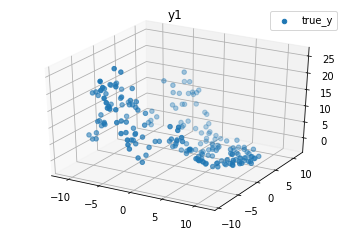

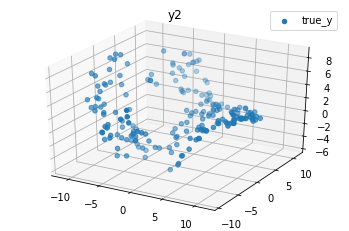

In [ ]:
plot_3D('y1', X, true_y[:, 0])
plot_3D('y2', X, true_y[:, 1])

Testing the model

loss value1: 59.76090489047699
loss value2: 34.40186388212373


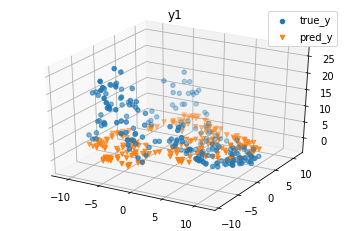

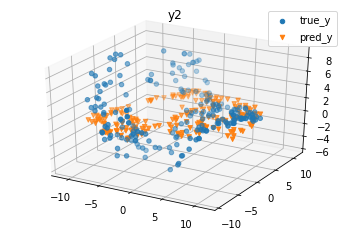

In [ ]:
loss = MSE()
model = Model(input_dim, 10)
pred_y = model(X)
loss_value = loss(pred_y, true_y)
print(f'loss value1: {loss_value}')
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
pred_y = model(X)
loss_value = loss(pred_y, true_y)
print(f'loss value2: {loss_value}')

plot_3D('y1', X, true_y[:, 0], pred_y[:, 0])
plot_3D('y2', X, true_y[:, 1], pred_y[:, 1])

Epoch 0, loss 34.40186388212373
Epoch 5, loss 11.689851322643774
Epoch 10, loss 6.376973215870504
Epoch 15, loss 4.279826481946442
Epoch 20, loss 2.978469823086674
Epoch 25, loss 5.032710697942704
Epoch 30, loss 3.9020640555474917
Epoch 35, loss 3.888359689393968
Epoch 40, loss 3.1795279545342976
Epoch 45, loss 3.430911343261427


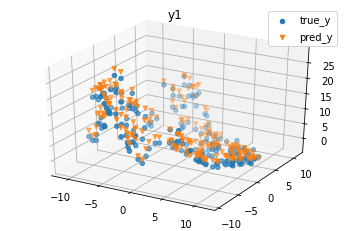

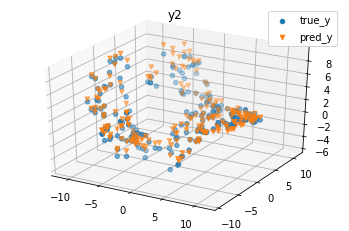

In [ ]:
#testing for larger number of epochs
fit(X, true_y, model=model, loss=loss, learning_rate=0.1, num_epochs=50)
pred_y = model(X)
plot_3D('y1',X, true_y[:, 0], pred_y[:, 0])
plot_3D('y2',X, true_y[:, 1], pred_y[:, 1])